In [1]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  


In [2]:
X_train = pd.read_csv('x_train_ex1data2(Home).csv') 
y_train = pd.read_csv('y_train_ex1data2(Home).csv') 
X_test  = pd.read_csv('x_test_ex1data2(Home).csv') 
y_test  = pd.read_csv('y_test_ex1data2(Home).csv') 


X_train = X_train.iloc[:,:] 
y_train = y_train.iloc[:,0]
X_test  = X_test.iloc[:,:]
y_test  = y_test.iloc[:,0]

In [3]:
n_exa_train =len(y_train)
n_exa_test =len(y_test)

# Normalización
#----------------------------------------

#chicos tanto la media como la desviacion estandar se calcula en base a los datos de entrenamiento y de prueba. Es
# por eso que estoy concatenando el conjunto de prueba y entrenamiendo 
X_media=np.concatenate((X_train,X_test),axis=0).mean(axis=0)
X_std=np.concatenate((X_train,X_test),axis=0).std(axis=0)
y_media=np.concatenate((y_train,y_test),axis=0).mean()
y_std=np.concatenate((y_train,y_test),axis=0).std()

X_train = (X_train - X_media)/X_std
y_train = (y_train - y_media)/y_std
X_test = (X_test - X_media)/X_std
y_test = (y_test - y_media)/y_std

#----------------------------------------


#Añadimos columnas de 1's para términos independientes
X_train  = np.concatenate((np.ones([n_exa_train,1]),X_train ), axis=1) 
X_test = np.concatenate((np.ones([n_exa_test,1]),X_test ), axis=1)
n_features = X_train.shape[1] #número de características en X



In [4]:
def predict(theta, data):
    return np.dot(data,theta)

In [5]:
#Ecuación normal
theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train)), y_train)    


In [6]:
y_pred_test = predict(theta, X_test )
Costo=((y_test-y_pred_test)**2).mean()/2 # Para el gradiente descendiente siempre estar dividio entre 2 para el conjunto de prueba
Costo=((y_test-y_pred_test)**2).mean() # algunos autores lo dividen entre 2 otros no.
print("Entrenamiento usando la ecuacion Normal") #Mínimo error cuadrático mediio
print("=========================================")
print("Vector Theta")
print(theta)
print("Costo (Error Cuadrático Medio)")
print(Costo)

Entrenamiento usando la ecuacion Normal
Vector Theta
[-0.01368891  0.75707463]
Costo (Error Cuadrático Medio)
0.2867196013706497


In [7]:
alpha = 0.2 #ratio de aprendizaje
iters = 500 #cantidad de iteraciones
theta = np.zeros(n_features) # inicializar con un vector de ceros.



# computecost (devuelve un escalar)
def computeCost(X,y,theta):
    m = X.shape[0] #tamaño en filas del conjunto de entrenamiento
    h_theta = np.dot(X,theta) #guarda los resultados de la hipotesis h(x), matriz de m filas    
    resultado = np.power( (h_theta-y) , 2)
    return ( np.sum(resultado) ) / (2*m) 


# gradient descent (devuelve theta y un vector de costo de tamaño iters). La función gradiente descendiente llama a la 
# función computecost iter veces. Solo puede haber un for para las iteraciones, no un for para los thetas 
def gradientDescent(X,y,theta,iters,alpha):
    costos = np.zeros(iters) #vector de costos para cada iteración
    m = X.shape[0] #tamaño en filas del conjunto de entrenamiento    
    for i in range(iters):
        costos[i] = computeCost(X,y,theta)
        h_theta = np.dot(X,theta) #guarda los resultados de la hipotesis h(x), matriz de m filas
        derivada = h_theta - y # sum[ (h(x)-y)]
        derivada = derivada / m
        gradiente = np.dot( np.transpose(X) ,derivada ) # sum[ (h(x)-y)*x ] / m
        theta = theta - (gradiente*alpha)
    return theta, costos
    

theta,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
y_pred_test = predict(theta, X_test )
Costo=((y_test-y_pred_test)**2).mean()

print("Entrenamiento usando Gradiente Descendiente")
print("=========================================")
print("Vector Theta")
print(theta)
print("Costo (Error Cuadratico Medio)")
print(Costo)


Entrenamiento usando Gradiente Descendiente
Vector Theta
[-0.01368891  0.75707463]
Costo (Error Cuadratico Medio)
0.2867196013706497


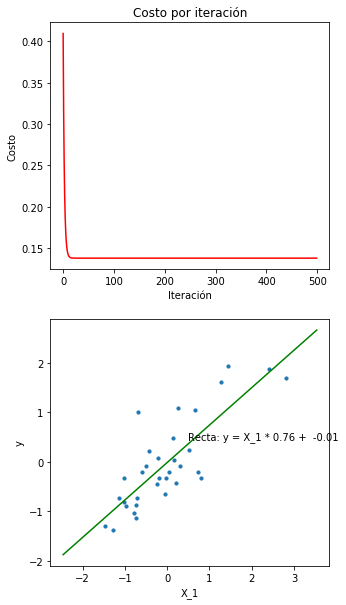

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10


#plot the cost
plt.subplot(2,1,1)
plt.plot(np.arange(iters), cost, 'r')  
plt.xlabel('Iteración')  
plt.ylabel('Costo')  
plt.title('Costo por iteración') # Esta gráfica es del costo en el conjunto de entrenamiento y debiera disminuir.

if n_features==2: # este ploteo solo funciona cuando el conjunto de datos tiene dos características
    plt.subplot(2,1,2)
    plt.scatter(X_train[:,1], y_train, s=10) # esto solo está ploteando los datos del conjunto de entremaniento. 
                                             # es solo para saber si la línea encontrada se ajusta a la distribución de 
                                             # los datos de entrenamiento
    linea = np.arange(np.min(X_train[:,1]-1), np.max(X_train[:,1]+1))
    linea = np.column_stack((np.ones(linea.shape[0]),linea))
    plt.plot(linea[:,1], predict(theta,linea), c="green")
    plt.xlabel('X_1')
    plt.ylabel('y')
    cadena ="Recta: y = X_1 * " + str(round(theta[1],2)) + " +  " + str(round(theta[0],2))
    plt.text(0.5, 0.5, cadena, horizontalalignment='left', verticalalignment='center',)

plt.show()